In [109]:
!pip install catboost
!pip install scikit-learn
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [275]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from catboost import CatBoostClassifier
from catboost import Pool
import matplotlib.pyplot as plt


In [111]:
from google.colab import output
output.enable_custom_widget_manager()

In [112]:
from google.colab import output
output.disable_custom_widget_manager()

In [230]:
data_src = "output/analyse_data_angular.json"

df = pd.read_json(data_src)

df.head()

,file,author,msg,date,is_broken
0,packages/compiler-cli/ngcc/src/host/commonjs_h...,Alex Rickabaugh,fix(ngcc): report the correct viaModule when r...,2019-10-17T19:43:39-04:00,True
1,packages/compiler-cli/ngcc/test/host/commonjs_...,Alex Rickabaugh,fix(ngcc): report the correct viaModule when r...,2019-10-17T19:43:39-04:00,True
2,packages/compiler-cli/ngcc/src/dependencies/de...,Alex Rickabaugh,feat(ngcc): support ignoreMissingDependencies ...,2019-10-17T19:43:39-04:00,False
3,packages/compiler-cli/ngcc/src/packages/config...,Alex Rickabaugh,feat(ngcc): support ignoreMissingDependencies ...,2019-10-17T19:43:39-04:00,False
4,packages/compiler-cli/ngcc/src/packages/entry_...,Alex Rickabaugh,feat(ngcc): support ignoreMissingDependencies ...,2019-10-17T19:43:39-04:00,False


In [258]:
train_df, test_df = train_test_split(df, test_size=0.2)

train_data, train_labels = train_df.loc[:, train_df.columns != 'is_broken'], train_df['is_broken'].astype(int)
test_data, test_labels = test_df.loc[:, train_df.columns != 'is_broken'], test_df['is_broken'].astype(int)

cat_features = [0, 1, 2, 3]
additional_metrics = ['Recall', 'Precision', 'Accuracy', 'F1']

In [259]:
model = CatBoostClassifier(
    cat_features=cat_features,
    random_seed=2,
    custom_metric=additional_metrics,
    train_dir = "bccommits"
)

In [260]:
model.fit(train_data, train_labels)

Learning rate set to 0.058593
0:	learn: 0.6579631	total: 66.1ms	remaining: 1m 6s
1:	learn: 0.6285877	total: 124ms	remaining: 1m 1s
2:	learn: 0.6032005	total: 168ms	remaining: 55.9s
3:	learn: 0.5805689	total: 219ms	remaining: 54.5s
4:	learn: 0.5621067	total: 266ms	remaining: 53s
5:	learn: 0.5458966	total: 310ms	remaining: 51.4s
6:	learn: 0.5236065	total: 365ms	remaining: 51.8s
7:	learn: 0.5020324	total: 426ms	remaining: 52.8s
8:	learn: 0.4811485	total: 480ms	remaining: 52.9s
9:	learn: 0.4689276	total: 529ms	remaining: 52.4s
10:	learn: 0.4584738	total: 588ms	remaining: 52.9s
11:	learn: 0.4474591	total: 641ms	remaining: 52.7s
12:	learn: 0.4365350	total: 689ms	remaining: 52.3s
13:	learn: 0.4294754	total: 743ms	remaining: 52.3s
14:	learn: 0.4204572	total: 798ms	remaining: 52.4s
15:	learn: 0.4126634	total: 850ms	remaining: 52.3s
16:	learn: 0.4065569	total: 902ms	remaining: 52.2s
17:	learn: 0.4019517	total: 952ms	remaining: 51.9s
18:	learn: 0.3979005	total: 1.01s	remaining: 52.1s
19:	learn: 0

In [261]:
predict = model.predict(test_data)

In [262]:
print(f"Precision: {precision_score(test_labels.astype(int), pd.DataFrame(predict)[0].astype(int))}")

Precision: 0.7314148681055156


In [271]:
import json

import pandas as pd

learn_info = dict.fromkeys(['Logloss'] + additional_metrics , [])
df = pd.DataFrame.from_dict(learn_info)

with open("bccommits/catboost_training.json", "r") as f:
    data = json.load(f)

for index, i in enumerate(data["iterations"]):
  df.loc[index] = i['learn']

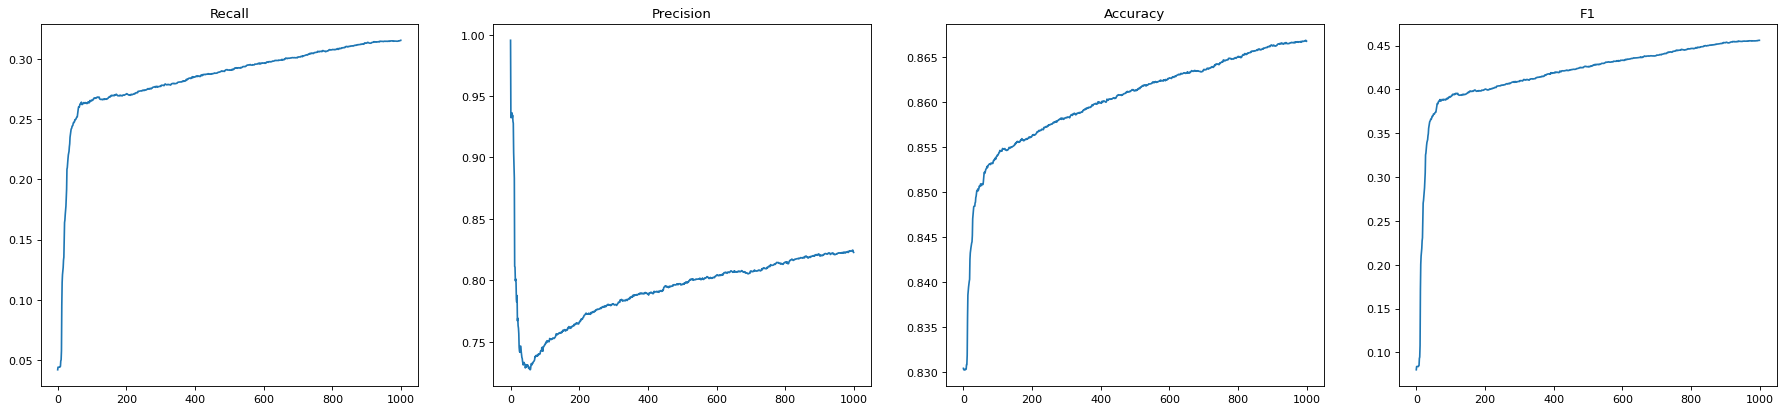

In [294]:
from matplotlib.pyplot import figure

fig, axs = plt.subplots(1, 4, figsize=(28, 6), dpi=80)

df['Recall'].plot(ax=axs[0], title="Recall")
df['Precision'].plot(ax=axs[1], title="Precision")
df['Accuracy'].plot(ax=axs[2], title="Accuracy")
df['F1'].plot(ax=axs[3], title="F1")
